## Output has been removed from this notebook to reduce file sizes in the repo

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import pandana as pdna
from pandana.loaders import osm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Download OpenStreetMap restaurants for a good part of the Bay Area

###### Note: used http://boundingbox.klokantech.com/ to get the bounding box

In [2]:
# Bounding box from link above
tmp = [-122.8662, 37.1373, -121.4798, 38.2158]

# Reordered for Pandana functions
bbox = [tmp[1], tmp[0], tmp[3], tmp[2]]

poi_df = osm.node_query(*bbox, tags='amenity=restaurant')
x, y = poi_df['lon'], poi_df['lat']

## Get previously stored OpenStreetMap networks for Bay Area

Download the data here: https://s3-us-west-1.amazonaws.com/synthpop-data2/pandana/osm_bayarea.h5

In [3]:
store = pd.HDFStore('data/osm_bayarea.h5', "r")
nodes = store.nodes
edges = store.edges
print(nodes.head(3))
print(edges.head(3))

             x          y
8  -121.546785  36.997092
9  -121.548863  36.999641
10 -121.550719  37.002132
   from  to      weight
6     8   9  338.255005
7     9  10  322.532990
8    10  11  218.505997


## Initialize and preprocess the network

In [4]:
net=pdna.Network(nodes.x, 
                 nodes.y, 
                 edges["from"], 
                 edges["to"],
                 edges[["weight"]])
net.precompute(3000)

## Nearest *point-of-interest* queries

In [5]:

net.set_pois("restaurants", 2000, 10, x, y)

In [6]:
a = net.nearest_pois(2000, "restaurants", num_pois=10)
print(a.head(1))

       1       2       3       4       5       6       7       8       9   \
8  2000.0  2000.0  2000.0  2000.0  2000.0  2000.0  2000.0  2000.0  2000.0   

       10  
8  2000.0  


## Here's a map of the distance to the nearest restaurant

(<mpl_toolkits.basemap.Basemap at 0x7ff2504891d0>,
 <Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff2504dbac8>)

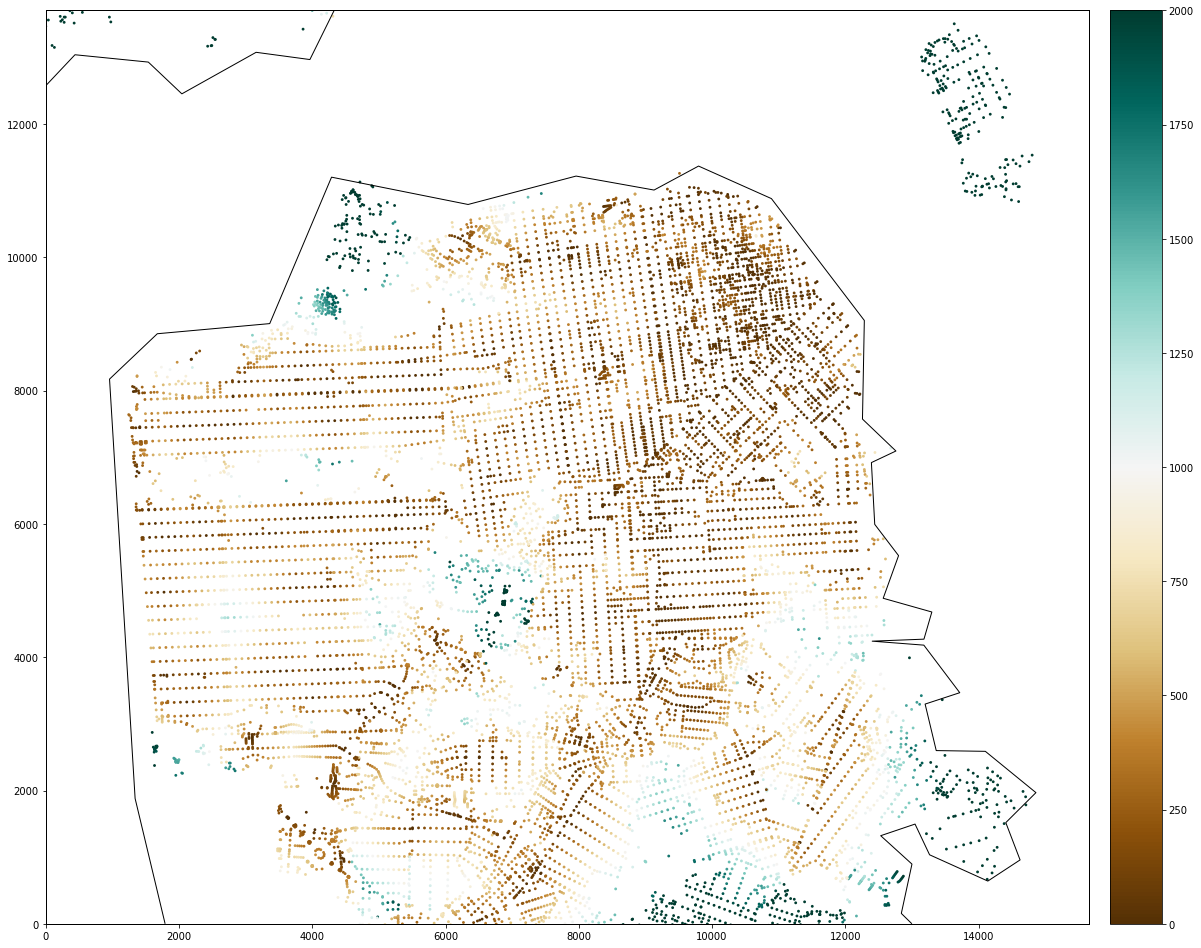

In [8]:
fig_kwargs = {'figsize': [20, 20]}
bmap_kwargs = {'suppress_ticks': False, 'resolution': 'h', 'epsg': '26943'}
plot_kwargs = {'cmap': 'BrBG', 's': 8, 'edgecolor': 'none'}

sf_tmp = [-122.524338, 37.707794, -122.34993, 37.834192]
sf_bbox = [sf_tmp[1], sf_tmp[0], sf_tmp[3], sf_tmp[2]]

net.plot(a[1], bbox=sf_bbox, 
         fig_kwargs=fig_kwargs, bmap_kwargs=bmap_kwargs, plot_kwargs=plot_kwargs)

## Here's a map of the distance to the 5th nearest restaurant

(<mpl_toolkits.basemap.Basemap at 0x7ff250360be0>,
 <Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff25032d3c8>)

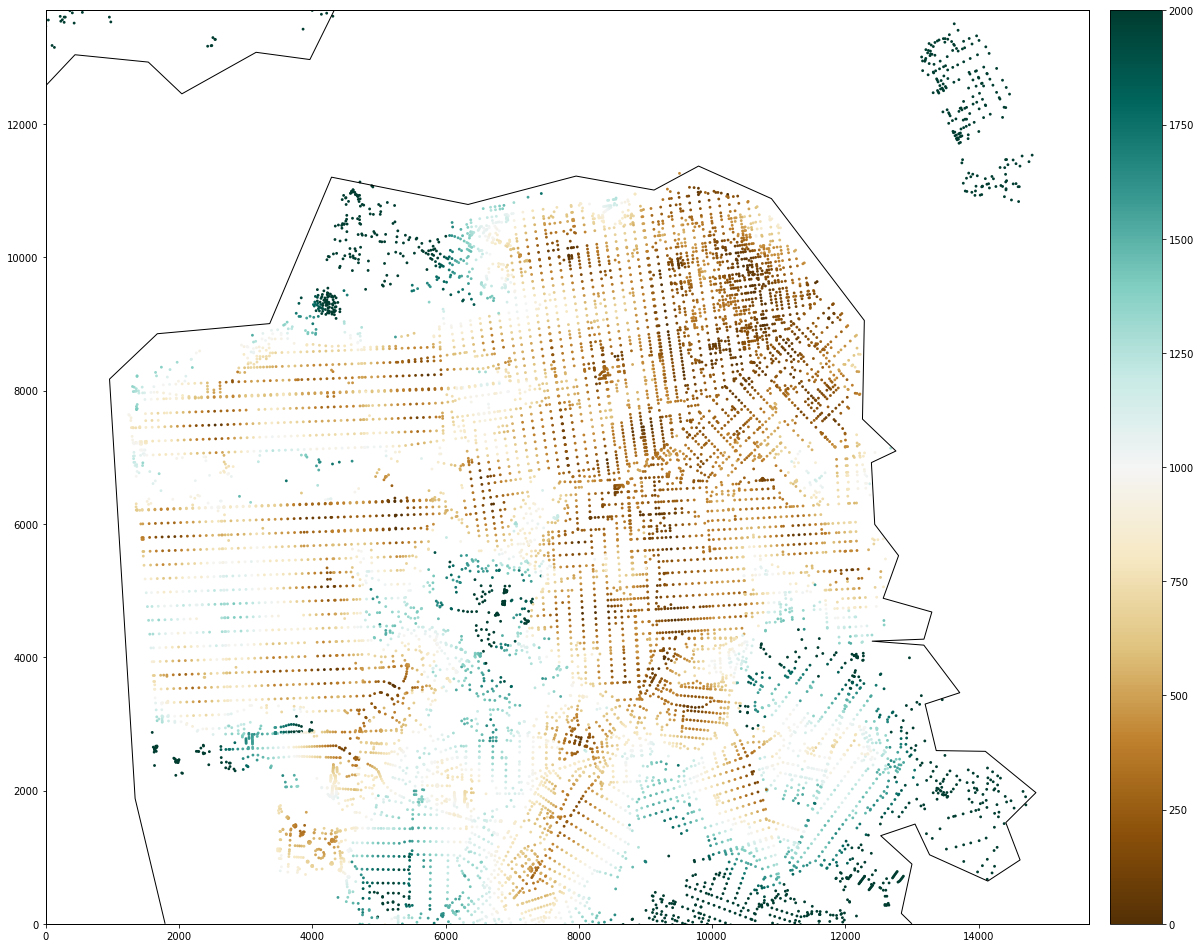

In [9]:
net.plot(a[5], bbox=sf_bbox, 
         fig_kwargs=fig_kwargs, bmap_kwargs=bmap_kwargs, plot_kwargs=plot_kwargs)

## Here's a map of the distance to the 10th nearest restaurant

(<mpl_toolkits.basemap.Basemap at 0x7ff2502130f0>,
 <Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff250288748>)

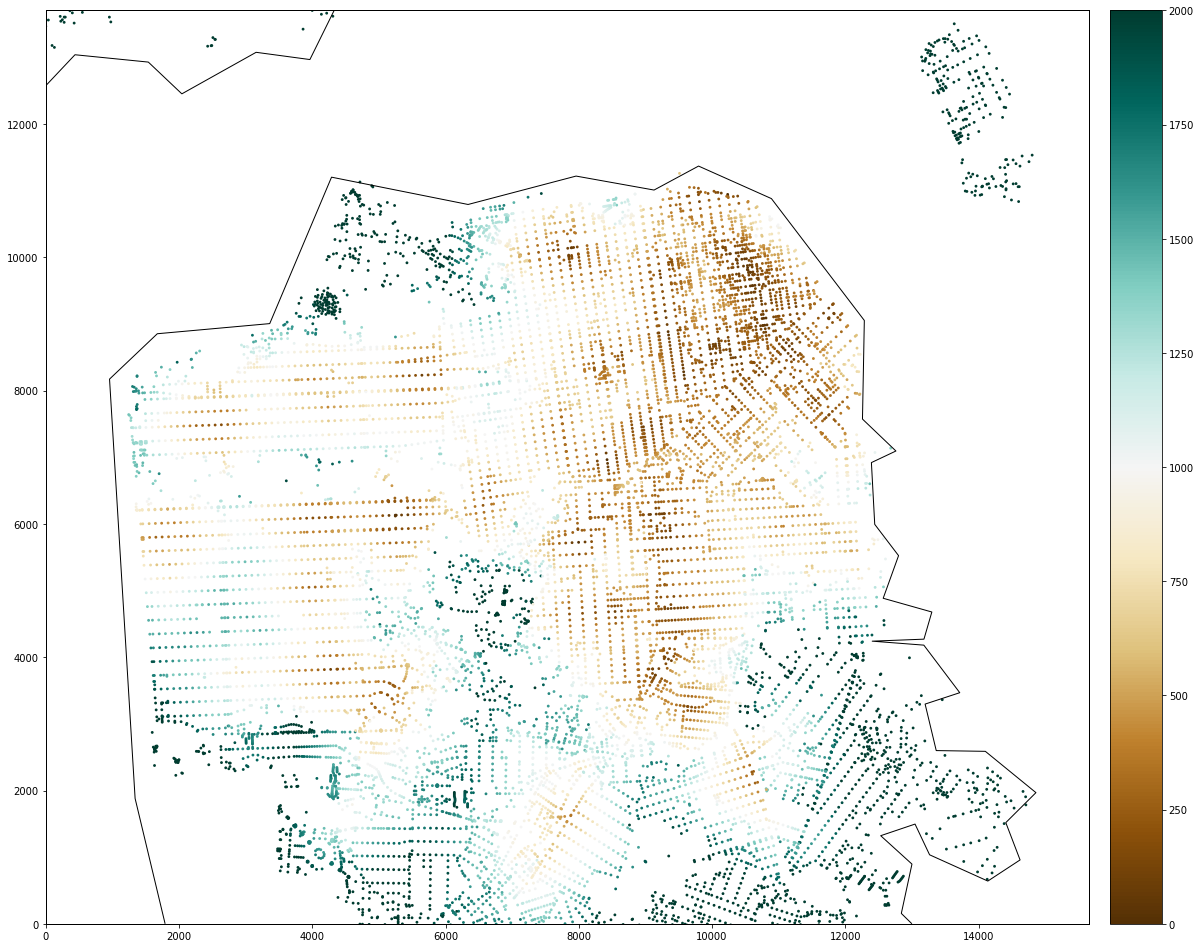

In [10]:
net.plot(a[10], bbox=sf_bbox, 
         fig_kwargs=fig_kwargs, bmap_kwargs=bmap_kwargs, plot_kwargs=plot_kwargs)

# A similar workflow is used to do general network aggregations

## Relate the x-ys to nodes

In [11]:
node_ids = net.get_node_ids(x, y)

## Assign the variable (in this case just location) to the network

In [12]:
net.set(node_ids)

## This is it - run the queries!

In [13]:
%time s = net.aggregate(500, type="sum", decay="linear")
%time t = net.aggregate(1000, type="sum", decay="linear")
%time u = net.aggregate(2000, type="sum", decay="linear")
%time v = net.aggregate(3000, type="sum", decay="linear")
%time w = net.aggregate(3000, type="count", decay="flat")

CPU times: user 1.12 s, sys: 22.9 ms, total: 1.15 s
Wall time: 175 ms
CPU times: user 1.29 s, sys: 7.72 ms, total: 1.3 s
Wall time: 198 ms
CPU times: user 1.72 s, sys: 9 ms, total: 1.73 s
Wall time: 257 ms
CPU times: user 2.29 s, sys: 3.1 ms, total: 2.3 s
Wall time: 356 ms
CPU times: user 2.45 s, sys: 7.93 ms, total: 2.45 s
Wall time: 409 ms


## Here's a map of access to restaurants with a 500m radius

(<mpl_toolkits.basemap.Basemap at 0x7ff2500bd5c0>,
 <Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff250140dd8>)

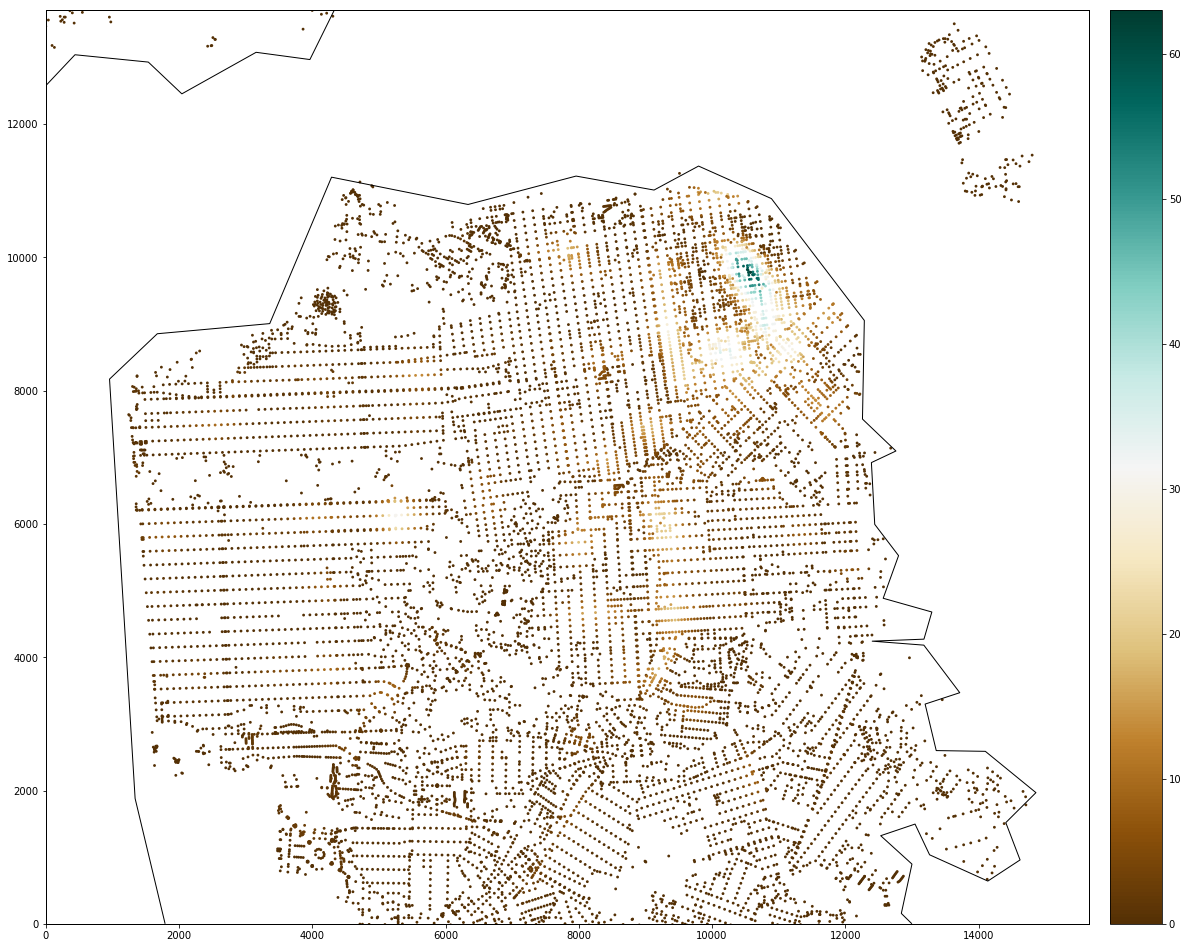

In [14]:
net.plot(s, bbox=sf_bbox, 
         fig_kwargs=fig_kwargs, bmap_kwargs=bmap_kwargs, plot_kwargs=plot_kwargs)

## Or 1000 meters

(<mpl_toolkits.basemap.Basemap at 0x7ff2500a60b8>,
 <Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff24e40da90>)

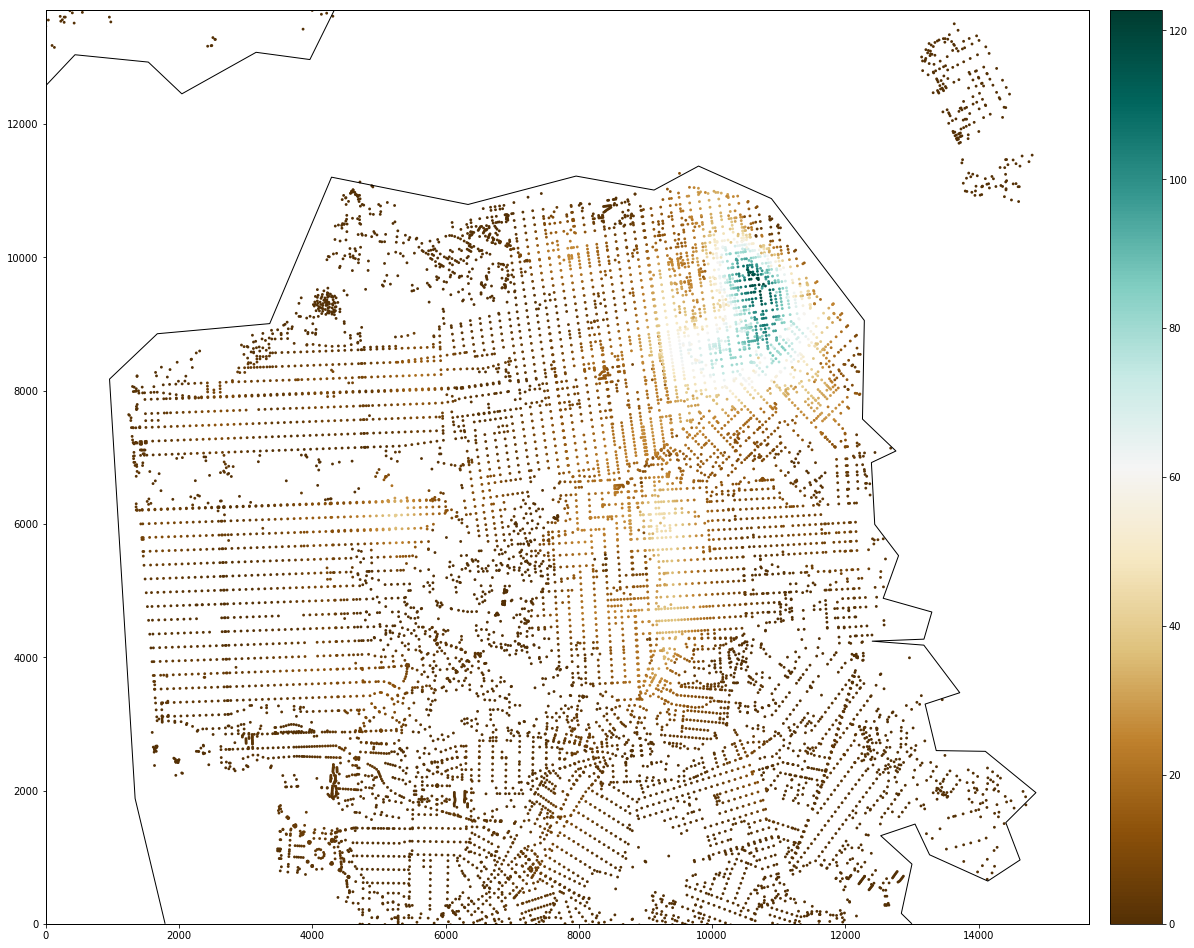

In [15]:
net.plot(t, bbox=sf_bbox, 
         fig_kwargs=fig_kwargs, bmap_kwargs=bmap_kwargs, plot_kwargs=plot_kwargs)

## Or 2000 meters radius

(<mpl_toolkits.basemap.Basemap at 0x7ff24ff49c88>,
 <Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff24ff6fdd8>)

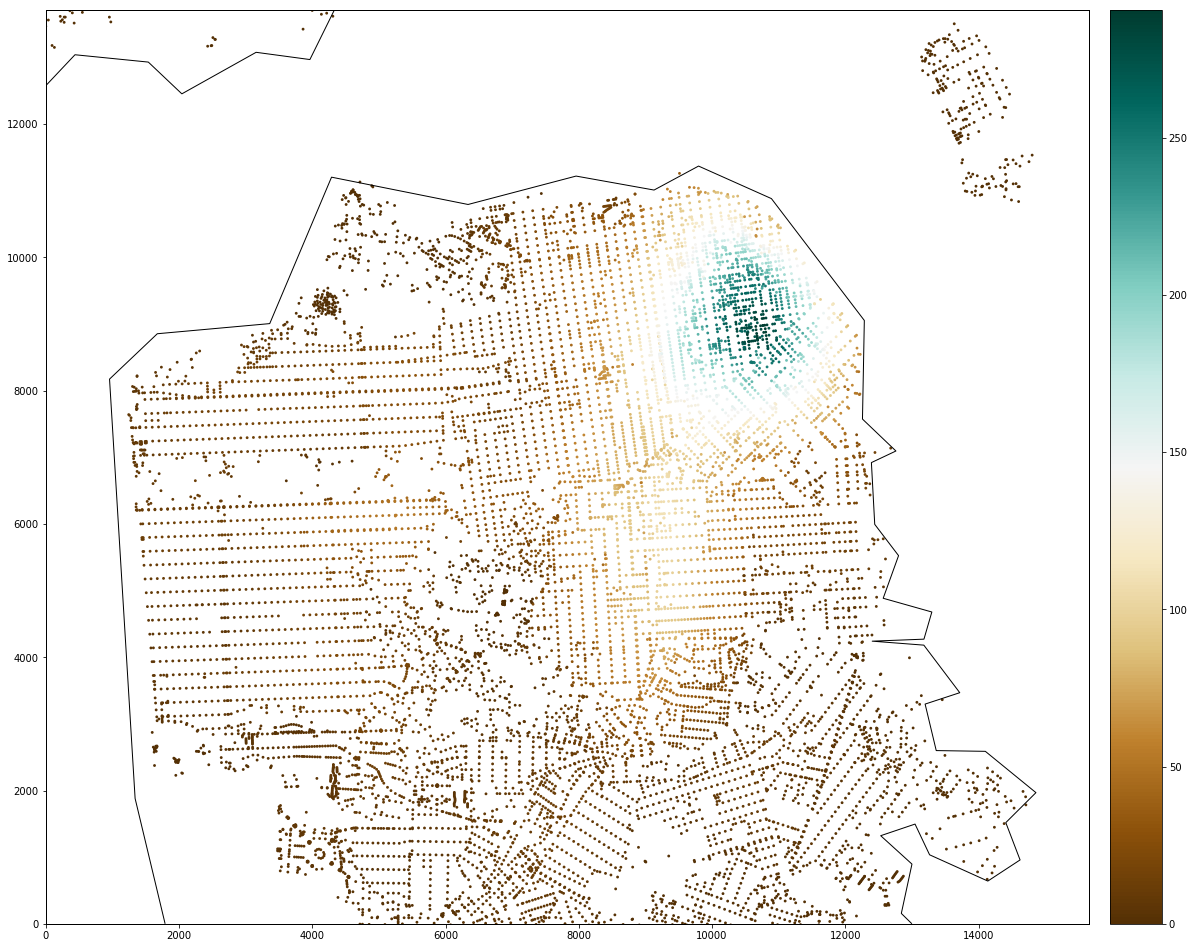

In [16]:
net.plot(u, bbox=sf_bbox, 
         fig_kwargs=fig_kwargs, bmap_kwargs=bmap_kwargs, plot_kwargs=plot_kwargs)

## Or 3000m radius

(<mpl_toolkits.basemap.Basemap at 0x7ff24fdef390>,
 <Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff24e3fc4a8>)

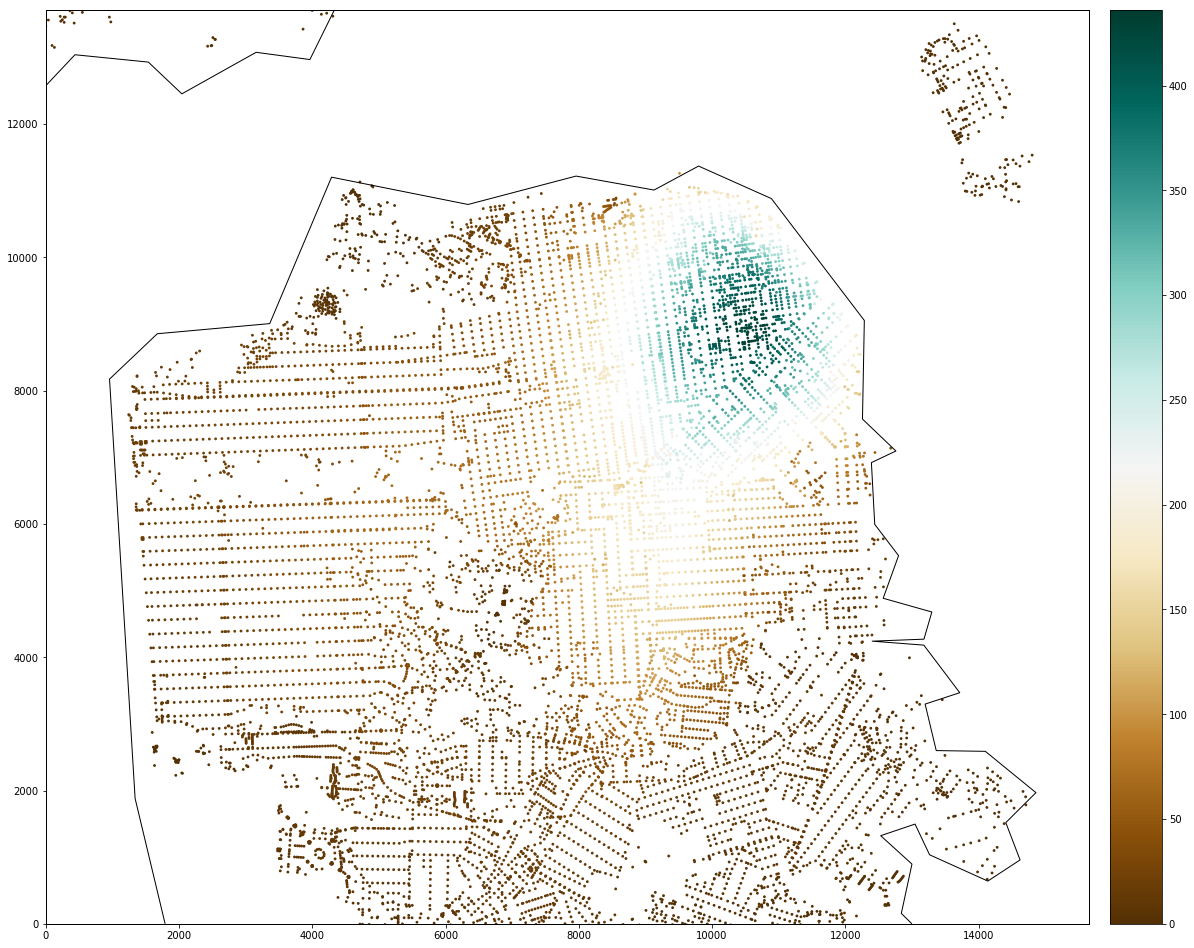

In [17]:
net.plot(v, bbox=sf_bbox, 
         fig_kwargs=fig_kwargs, bmap_kwargs=bmap_kwargs, plot_kwargs=plot_kwargs)

## Or the whole Bay Area region

(<mpl_toolkits.basemap.Basemap at 0x7ff24e511828>,
 <Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff24e550278>)

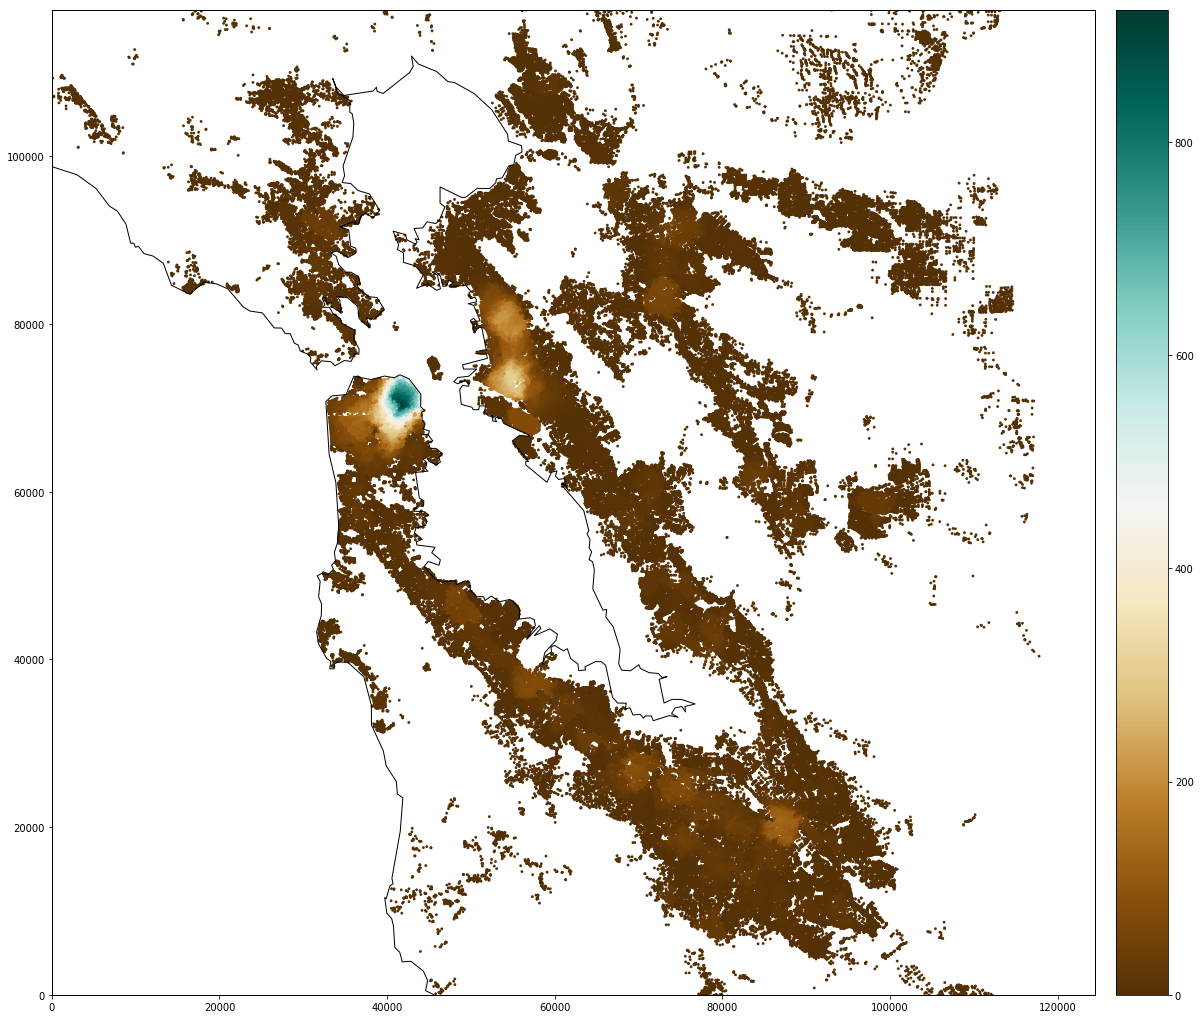

In [18]:
net.plot(w, bbox=bbox, 
         fig_kwargs=fig_kwargs, bmap_kwargs=bmap_kwargs, plot_kwargs=plot_kwargs)